<a href="https://colab.research.google.com/github/varunsmhatre/TF-Developer/blob/main/Classification/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## MNIST

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [7]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [13]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5292 - accuracy: 0.8145 - val_loss: 0.4152 - val_accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8612 - val_loss: 0.4577 - val_accuracy: 0.8454
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3438 - accuracy: 0.8747 - val_loss: 0.3867 - val_accuracy: 0.8567
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3217 - accuracy: 0.8826 - val_loss: 0.3618 - val_accuracy: 0.8724
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.8856 - val_loss: 0.3675 - val_accuracy: 0.8648
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2883 - accuracy: 0.8925 - val_loss: 0.3575 - val_accuracy: 0.8726
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2765 - accuracy: 0.8961 - val_loss: 0.3733 - val_accuracy:

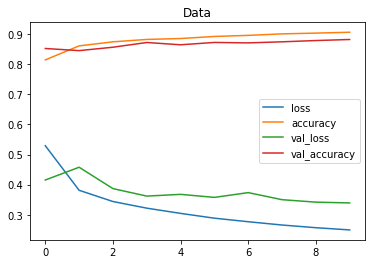

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot(title="Data")

In [15]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
# https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [16]:
y_probs = model.predict(test_data)
y_probs[:5]

array([[2.4629949e-09, 1.5899336e-07, 2.7642633e-10, 1.0861421e-08,
        1.8933036e-11, 1.2639957e-04, 1.3178988e-05, 1.1853425e-02,
        3.3062468e-09, 9.8800683e-01],
       [3.2167874e-05, 2.4974429e-09, 9.9783200e-01, 6.9326028e-08,
        1.3476115e-03, 1.1769791e-18, 7.8813254e-04, 1.4633085e-29,
        1.4337213e-08, 4.9240040e-19],
       [4.3338759e-09, 1.0000000e+00, 3.5289832e-10, 1.3651512e-09,
        7.2035489e-10, 1.3538227e-16, 1.0498423e-10, 6.2504034e-29,
        4.7273207e-14, 1.6265919e-14],
       [5.9032484e-08, 9.9999988e-01, 4.3978527e-09, 1.4354646e-07,
        1.5253701e-08, 4.5985416e-12, 4.1042565e-09, 3.4048756e-22,
        3.6037014e-11, 2.2653041e-11],
       [8.3280876e-02, 4.9344089e-07, 3.0017935e-02, 3.3271915e-04,
        4.1116746e-03, 7.1971198e-09, 8.8192254e-01, 4.0746101e-11,
        3.3373226e-04, 9.1267992e-08]], dtype=float32)

In [17]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[866,   0,  12,  34,  11,   1,  67,   2,   7,   0],
       [  3, 967,   1,  22,   6,   0,   0,   0,   1,   0],
       [ 16,   0, 742,  13, 163,   0,  65,   0,   1,   0],
       [ 19,   8,   4, 904,  36,   0,  26,   0,   3,   0],
       [  1,   1,  59,  26, 885,   0,  28,   0,   0,   0],
       [  0,   0,   0,   1,   0, 964,   0,  23,   0,  12],
       [152,   3,  80,  38, 110,   0, 604,   0,  13,   0],
       [  0,   0,   0,   0,   0,  15,   0, 954,   0,  31],
       [  3,   0,   0,   5,   6,   3,   5,   3, 975,   0],
       [  1,   0,   0,   0,   0,   5,   0,  31,   0, 963]])

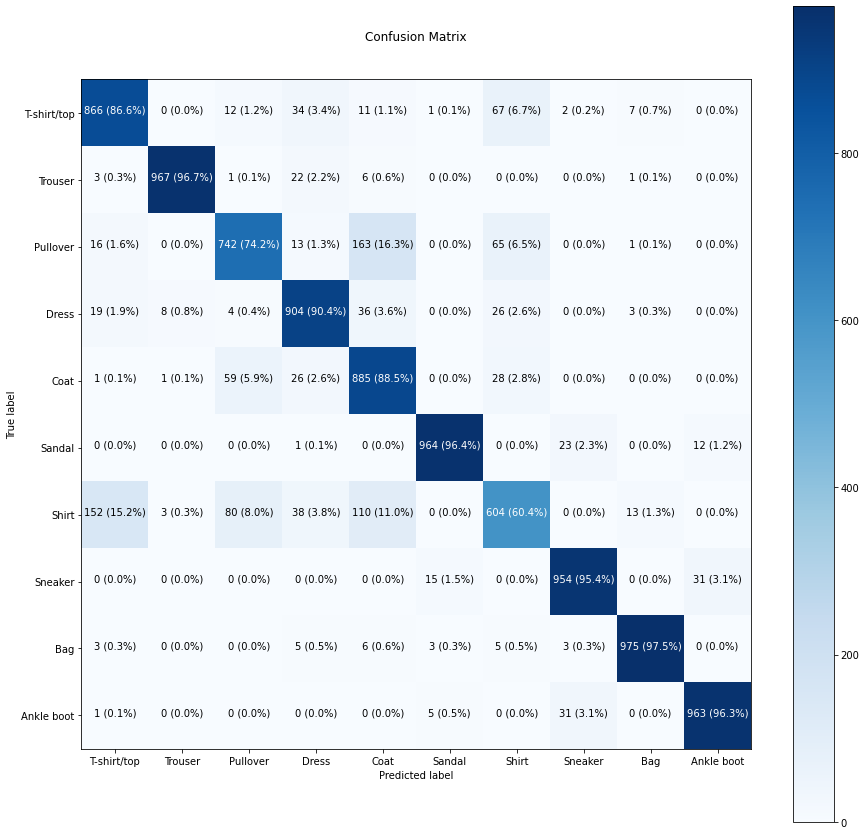

In [19]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)